<a href="https://colab.research.google.com/github/adityagupta1707/Data-Science-January/blob/Data-Science/Churn_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/ANN/Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x = dataset.iloc[:,3:13]

In [5]:
x


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
y = dataset.iloc[:,13]

In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
#Convert Geography and Gender into numerical values

geography = pd.get_dummies(x["Geography"],drop_first=True)
gender = pd.get_dummies(x["Gender"],drop_first=True)

In [9]:
#Joining geography and gender together

x = pd.concat([x,geography,gender],axis=1)

In [10]:
x.drop(['Geography','Gender'],axis=1,inplace=True)

In [11]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
#For training and testing of the model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [14]:
#Using standard scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
#ANN model

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
from tensorflow.keras import initializers


In [17]:
model = Sequential()
model.add(Dense(units=11, activation='relu'))
model.add(Dense(units=100, activation='relu',kernel_initializer=initializers.HeUniform()))
model.add(Dense(units=50, activation='relu',kernel_initializer=initializers.GlorotUniform()))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='AdaDelta',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model_history=model.fit(x_train,y_train,batch_size=32,epochs=50,validation_split=0.20)


Epoch 1/50
168/168 [==============================] - 8s 10ms/step - loss: 0.8355 - accuracy: 0.3104 - val_loss: 0.8211 - val_accuracy: 0.3216
Epoch 2/50
168/168 [==============================] - 1s 5ms/step - loss: 0.8155 - accuracy: 0.3302 - val_loss: 0.8010 - val_accuracy: 0.3433
Epoch 3/50
168/168 [==============================] - 1s 4ms/step - loss: 0.7960 - accuracy: 0.3580 - val_loss: 0.7814 - val_accuracy: 0.3754
Epoch 4/50
168/168 [==============================] - 1s 5ms/step - loss: 0.7772 - accuracy: 0.3884 - val_loss: 0.7626 - val_accuracy: 0.4075
Epoch 5/50
168/168 [==============================] - 1s 4ms/step - loss: 0.7592 - accuracy: 0.4099 - val_loss: 0.7447 - val_accuracy: 0.4276
Epoch 6/50
168/168 [==============================] - 1s 4ms/step - loss: 0.7421 - accuracy: 0.4368 - val_loss: 0.7280 - val_accuracy: 0.4493
Epoch 7/50
168/168 [==============================] - 1s 5ms/step - loss: 0.7262 - accuracy: 0.4582 - val_loss: 0.7123 - val_accuracy: 0.4746
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


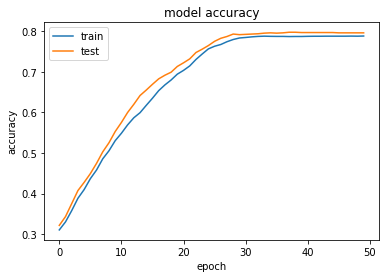

In [26]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
model_history.history


{'accuracy': [0.3104477524757385,
  0.3302238881587982,
  0.35802239179611206,
  0.3884328305721283,
  0.40988805890083313,
  0.4367537200450897,
  0.45820894837379456,
  0.4858208894729614,
  0.5055969953536987,
  0.5304104685783386,
  0.5486940145492554,
  0.5694029927253723,
  0.5869402885437012,
  0.5994402766227722,
  0.6175373196601868,
  0.6350746154785156,
  0.6537313461303711,
  0.6679104566574097,
  0.6800373196601868,
  0.6944029927253723,
  0.7037313580513,
  0.7147387862205505,
  0.7305970191955566,
  0.7440298795700073,
  0.7567164301872253,
  0.7632462978363037,
  0.7675372958183289,
  0.7744402885437012,
  0.7798507213592529,
  0.7835820913314819,
  0.7848880887031555,
  0.7863805890083313,
  0.7875000238418579,
  0.7880597114562988,
  0.7876865863800049,
  0.7875000238418579,
  0.7875000238418579,
  0.7871268391609192,
  0.7873134613037109,
  0.7873134613037109,
  0.7876865863800049,
  0.7878731489181519,
  0.7878731489181519,
  0.7880597114562988,
  0.7880597114562988

In [23]:
model_history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

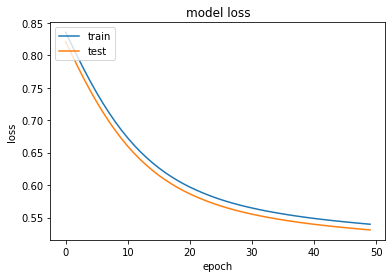

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [30]:
cm

array([[2643,   14],
       [ 640,    3]])

In [31]:
score

0.8018181818181818

In [37]:
model.save('model.h5')


In [38]:
keras.models.load_model('model.h5')


In [34]:
a=keras.models.load_model('model.h5')


In [35]:
# Layer Weight Initializer

for layer in model.layers: 
  print(layer.get_config(), layer.get_weights())


{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 11, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.10079014, -0.29972765, -0.0777311 ,  0.32362184,  0.40030107,
         0.26857466,  0.02307928, -0.05627042,  0.0081086 ,  0.51700056,
        -0.30833548],
       [ 0.32795176,  0.29322034,  0.38596264,  0.20018192,  0.11001208,
         0.31221333,  0.32788146, -0.196018  ,  0.13815832, -0.50484604,
        -0.5103387 ],
       [ 0.17322917, -0.2515331 , -0.3639273 , -0.11836169,  0.36856025,
        -0.23557144,  0.03757392, -0.32972082,  0.03348344,  0.00817288,
        -0.18537156],
       [ 0.25422534, -0.2992877 , -0.50375223, -0.18700525,  0.28537473,
         0.5128934 ,  0.34294188,  0